In [ ]:
!pip install kaggle


# Files setup

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saurabh78935","key":"60f5d683f80654af13a1815b140b3e03"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

# Downloading dataset

In [ ]:
! kaggle datasets download -d techsash/waste-classification-data

 98% 417M/427M [00:05<00:00, 44.5MB/s]
100% 427M/427M [00:05<00:00, 83.4MB/s]


In [ ]:
!unzip /content/waste-classification-data.zip -d /content/dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: /content/dataset/dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: /content/dataset/dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: /content/dataset/dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: /content/dataset/dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: /content/dataset/dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: /content/dataset/dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: /content/dataset/dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: /content/dataset/dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: /content/dataset/dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: /content/dataset/dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: /content/dataset/dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: /content/dataset/dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: /content/dataset/dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: /c

In [ ]:
import os

os.listdir('/content/dataset')

# two subdirectory in one dataset directory

['DATASET', 'dataset']

In [ ]:
print("Contents of the first 'dataset' directory:")
print(os.listdir('/content/dataset/dataset'))

print("\nContents of the 'DATASET' directory:")
print(os.listdir('/content/dataset/DATASET'))

# DATASET dirctory have 'test' and 'train'

Contents of the first 'dataset' directory:
['DATASET']

Contents of the 'DATASET' directory:
['TRAIN', 'TEST']


In [ ]:
print("Contents of the 'TEST' directory:")
print(os.listdir('/content/dataset/DATASET/TEST'))

print("\nContents of the 'TRAIN' directory:")
print(os.listdir('/content/dataset/DATASET/TRAIN'))
#test and train directories have 'R' , 'O' directory respectively
# r- recyclabale and o - oraganic

Contents of the 'TEST' directory:
['R', 'O']

Contents of the 'TRAIN' directory:
['R', 'O']


In [ ]:
print("Contents of the 'R' directory in 'TEST':")
print(os.listdir('/content/dataset/DATASET/TEST/R'))

print("\nContents of the 'O' directory in 'TEST':")
print(os.listdir('/content/dataset/DATASET/TEST/O'))

print("\nContents of the 'R' directory in 'TRAIN':")
print(os.listdir('/content/dataset/DATASET/TRAIN/R'))

print("\nContents of the 'O' directory in 'TRAIN':")
print(os.listdir('/content/dataset/DATASET/TRAIN/O'))


Contents of the 'R' directory in 'TEST':
['R_10773.jpg', 'R_10253.jpg', 'R_10690.jpg', 'R_10166.jpg', 'R_10610.jpg', 'R_10131.jpg', 'R_10689.jpg', 'R_10924.jpg', 'R_10585.jpg', 'R_10739.jpg', 'R_10656.jpg', 'R_10853.jpg', 'R_10115.jpg', 'R_10662.jpg', 'R_10019.jpg', 'R_10651.jpg', 'R_10910.jpg', 'R_10473.jpg', 'R_10222.jpg', 'R_10685.jpg', 'R_10064.jpg', 'R_10500.jpg', 'R_10571.jpg', 'R_10798.jpg', 'R_10601.jpg', 'R_11036.jpg', 'R_10439.jpg', 'R_10157.jpg', 'R_10316.jpg', 'R_10427.jpg', 'R_10701.jpg', 'R_10932.jpg', 'R_10487.jpg', 'R_10334.jpg', 'R_10121.jpg', 'R_10311.jpg', 'R_10202.jpg', 'R_10087.jpg', 'R_10408.jpg', 'R_10723.jpg', 'R_10727.jpg', 'R_10381.jpg', 'R_11005.jpg', 'R_10653.jpg', 'R_10775.jpg', 'R_10258.jpg', 'R_11109.jpg', 'R_11061.jpg', 'R_10467.jpg', 'R_11042.jpg', 'R_10833.jpg', 'R_10814.jpg', 'R_10864.jpg', 'R_11084.jpg', 'R_11054.jpg', 'R_10308.jpg', 'R_11009.jpg', 'R_11080.jpg', 'R_10141.jpg', 'R_10956.jpg', 'R_10809.jpg', 'R_10038.jpg', 'R_10088.jpg', 'R_10884.jpg'

In [ ]:
train_path = "/kaggle/input/waste-classification-data/DATASET/TRAIN/"
test_path = "/kaggle/input/waste-classification-data/DATASET/TEST/"

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from tqdm import tqdm
import cv2

# Images in each directory of train and test

In [ ]:
train_r_dir = '/content/dataset/DATASET/TRAIN/R'
train_o_dir = '/content/dataset/DATASET/TRAIN/O'
test_r_dir = '/content/dataset/DATASET/TEST/R'
test_o_dir = '/content/dataset/DATASET/TEST/O'

images from the training set:


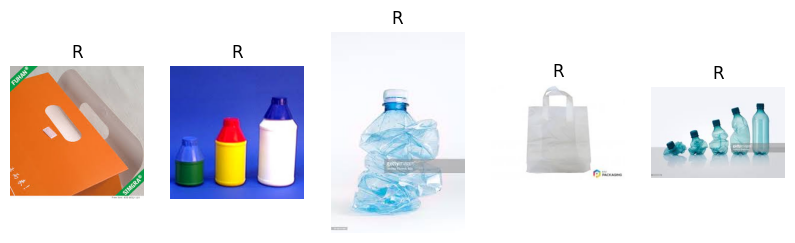

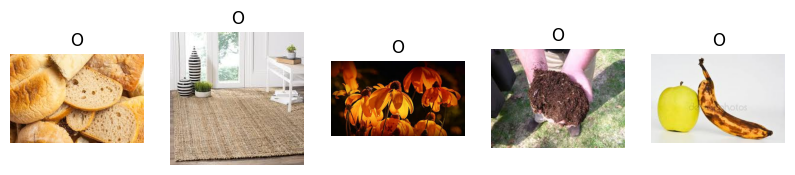

images from the testing set:


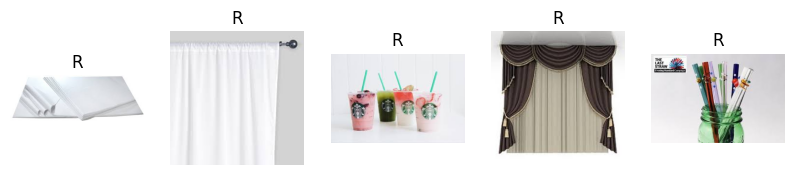

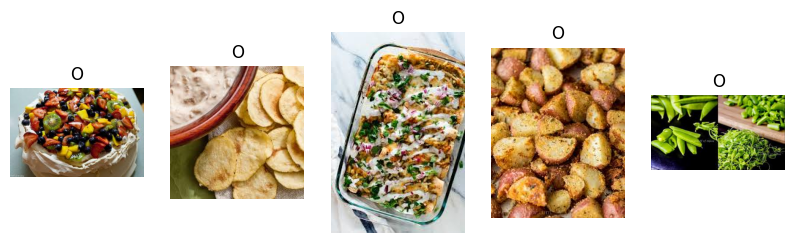

In [ ]:
def display_images(directory, label):
    plt.figure(figsize=(10, 5))
    files = os.listdir(directory)
    sample_files = files[:5]
    for i, file in enumerate(sample_files):
        img_path = os.path.join(directory, file)
        img = mpimg.imread(img_path)
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    plt.show()

print("images from the training set:")
display_images(train_r_dir, 'R')
display_images(train_o_dir, 'O')


print("images from the testing set:")
display_images(test_r_dir, 'R')
display_images(test_o_dir, 'O')

# Importing libraries

In [ ]:
!pip install keras --upgrade

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [ ]:
train_path = "/content/dataset/DATASET/TRAIN/"

x_data = []
y_data = []


for category in glob(train_path + '*'):
    print("Category:", category)
    for file in tqdm(glob(category + '/*')):
        img_array = cv2.imread(file)
        if img_array is None:
            print("Error loading image:", file)
            continue
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])


print("Number of images loaded:", len(x_data))

data = pd.DataFrame({'image': x_data, 'label': y_data})

print("Shape of data:", data.shape)

Category: /content/dataset/DATASET/TRAIN/R


100%|██████████| 9999/9999 [00:07<00:00, 1325.11it/s]


Category: /content/dataset/DATASET/TRAIN/O


100%|██████████| 12565/12565 [00:10<00:00, 1188.78it/s]

Number of images loaded: 22564
Shape of data: (22564, 2)


In [ ]:
# final data
print("Shape of data:", data.shape)

Shape of data: (22564, 2)


In [ ]:
from collections import Counter
Counter(y_data)

Counter({'R': 9999, 'O': 12565})

# Visualization

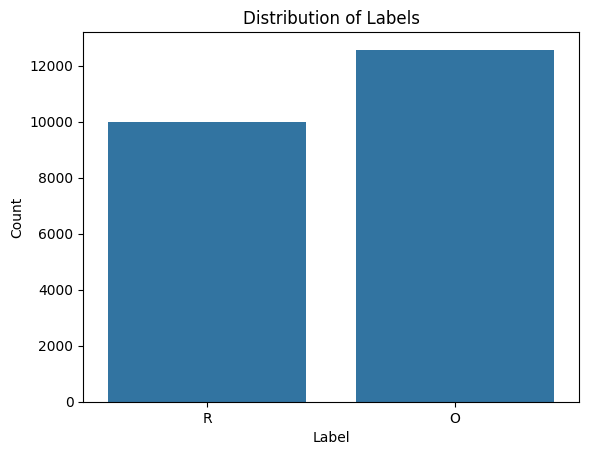

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=data)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

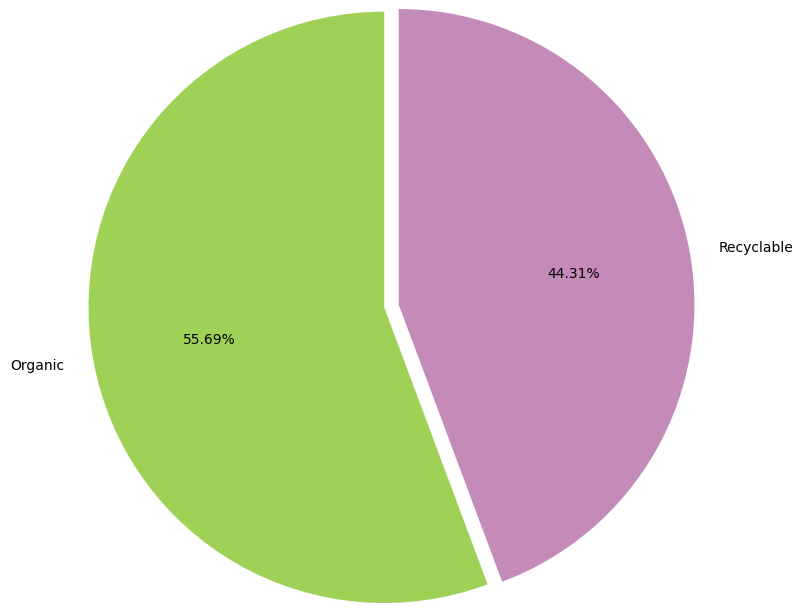

In [ ]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

# waste is classified in two types organic and recyclable

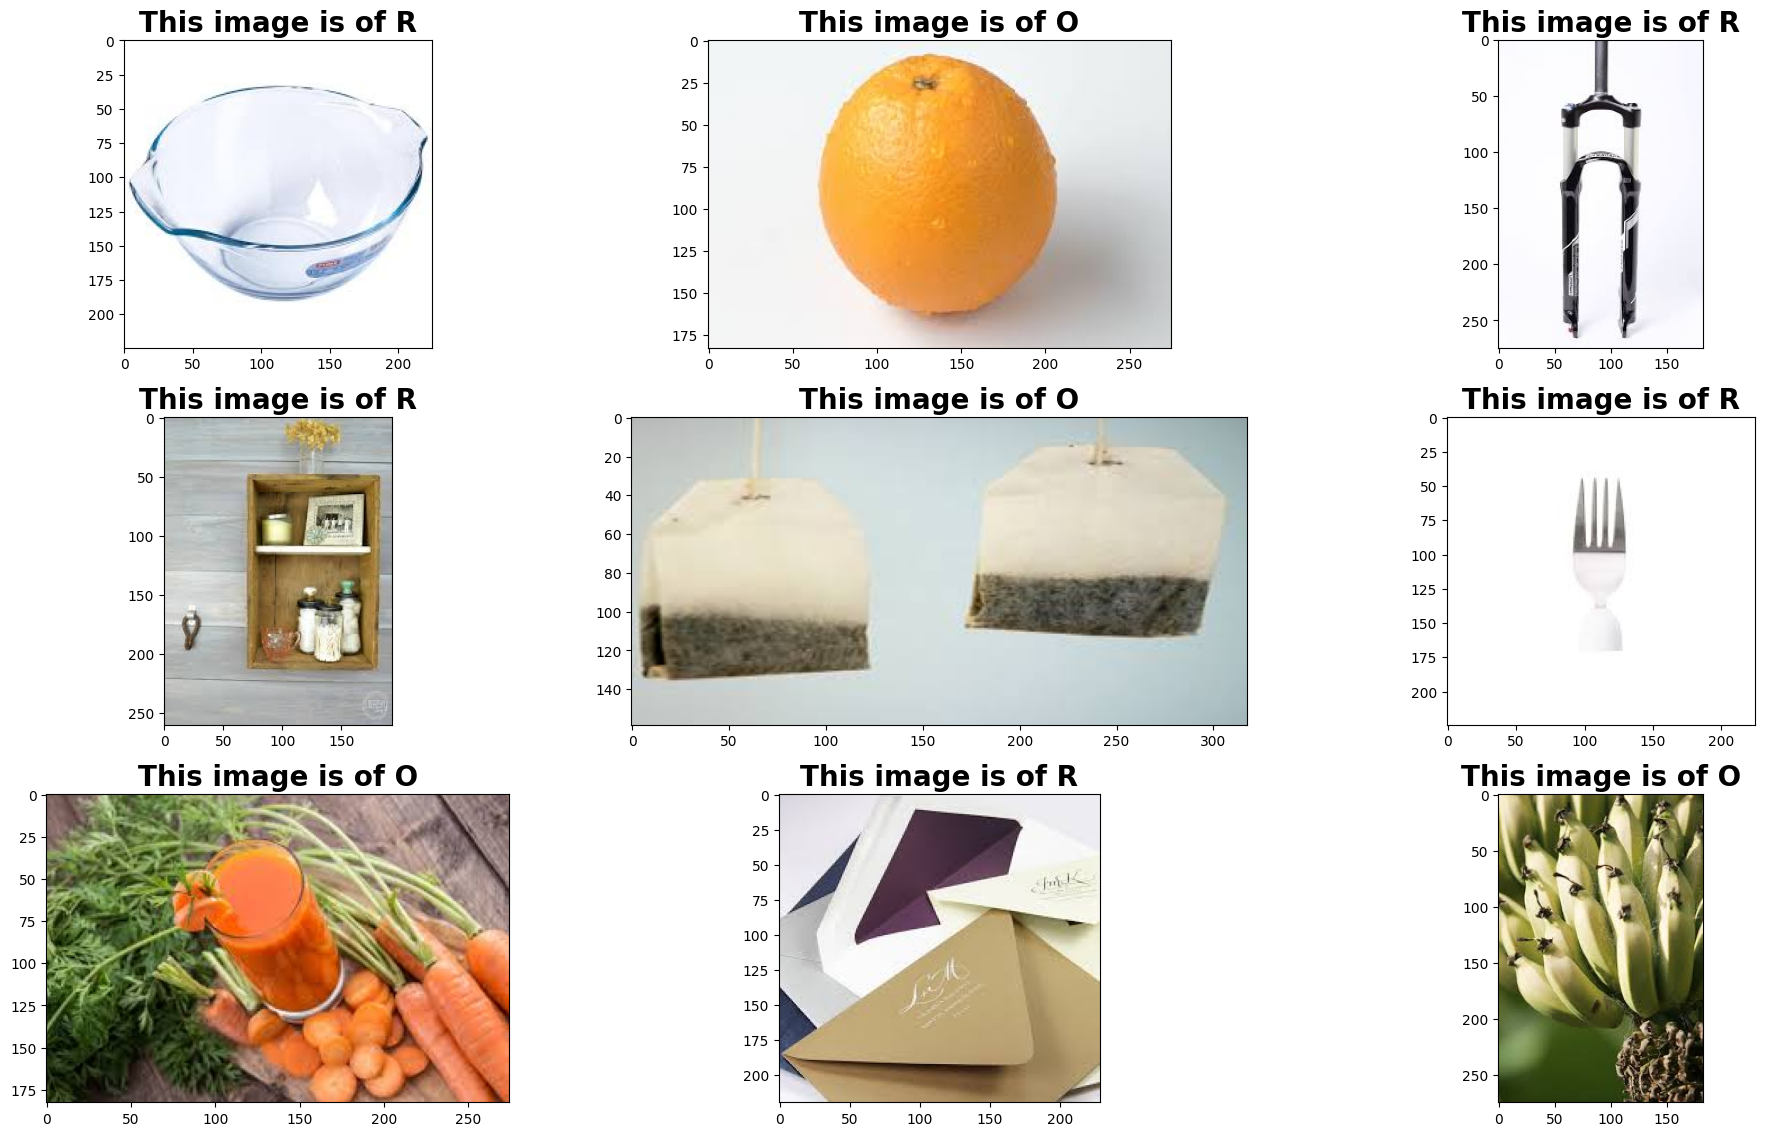

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

    # o -> organic
    # R -> Recyclable

In [ ]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


# Model building

In [ ]:
from tensorflow.keras import models , layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(numberOfClass, activation='sigmoid'))

In [ ]:
model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

batch_size = 256

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
# train generator
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")


Found 22564 images belonging to 2 classes.


In [ ]:
# Test generator
test_generator = test_datagen.flow_from_directory(
    "/content/dataset/DATASET/TEST/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")


Found 2513 images belonging to 2 classes.


# trainning the model

In [ ]:
hist = model.fit(
        x = train_generator,
        epochs=5,
        validation_data = test_generator)


Epoch 1/5
89/89 [==============================] - 78s 681ms/step - loss: 0.5375 - accuracy: 0.7656 - val_loss: 0.3918 - val_accuracy: 0.8357
Epoch 2/5
89/89 [==============================] - 57s 642ms/step - loss: 0.4203 - accuracy: 0.8255 - val_loss: 0.3679 - val_accuracy: 0.8492
Epoch 3/5
89/89 [==============================] - 58s 648ms/step - loss: 0.3748 - accuracy: 0.8466 - val_loss: 0.2581 - val_accuracy: 0.9017
Epoch 4/5
89/89 [==============================] - 56s 635ms/step - loss: 0.3459 - accuracy: 0.8636 - val_loss: 0.2957 - val_accuracy: 0.8866
Epoch 5/5
89/89 [==============================] - 57s 636ms/step - loss: 0.3109 - accuracy: 0.8771 - val_loss: 0.2919 - val_accuracy: 0.8814


In [ ]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

# predictions

In [ ]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

In [ ]:
test_img = cv2.imread("/kaggle/input/waste-classification-data/DATASET/TEST/O/O_12573.jpg")
predict_func(test_img) # this is an oraganic image

In [ ]:
test_img = cv2.imread("/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10753.jpg")
predict_func(test_img)  # recylable